In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1=open('/content/drive/MyDrive/RegressionData.csv')

In [3]:
data=pd.read_csv(file1)

In [4]:
data


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,FlightDate,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,Unnamed: 0_y,airport_x,date_x,windspeedKmph_x,winddirDegree_x,weatherCode_x,precipMM_x,visibility_x,pressure_x,cloudcover_x,DewPointF_x,WindGustKmph_x,tempF_x,WindChillF_x,humidity_x,time_x,Unnamed: 0.1.1,airport_y,date_y,windspeedKmph_y,winddirDegree_y,weatherCode_y,precipMM_y,visibility_y,pressure_y,cloudcover_y,DewPointF_y,WindGustKmph_y,tempF_y,WindChillF_y,humidity_y,time_y
0,0,1605368,380364,2017-07-27,3,2017,7,27,2332.0,1.0,2200,72.0,12892,13204,722.0,600,1.0,47.0,LAX,MCO,630,MCO,2017-07-27,8,163,113,0.1,10,1016,15,76,12,82,82,82,600,646,LAX,2017-07-27,9,230,113,0.0,10,1013,0,70,10,83,83,70,2200
1,1,858232,44803,2016-09-08,3,2016,9,8,1017.0,1.0,800,92.0,14107,10397,1706.0,1500,1.0,94.0,PHX,ATL,183,ATL,2016-09-08,8,273,113,0.0,10,1017,0,60,10,89,90,36,1500,176,PHX,2016-09-08,8,255,116,0.0,10,1017,18,70,9,83,80,71,800
2,2,1580428,128154,2017-06-30,2,2017,6,30,1057.0,1.0,900,112.0,12892,14771,1246.0,1000,1.0,144.0,LAX,SFO,706,SFO,2017-06-30,20,265,113,0.0,10,1013,25,53,22,60,61,73,1000,705,LAX,2017-06-30,8,205,113,0.0,10,1012,0,61,9,63,64,84,900
3,3,963048,145973,2017-01-11,1,2017,1,11,1239.0,1.0,1100,84.0,11292,14747,1426.0,1300,1.0,75.0,DEN,SEA,253,SEA,2017-01-11,12,19,119,0.0,10,1011,78,20,15,28,20,71,1300,251,DEN,2017-01-11,10,195,113,0.0,10,1001,14,29,18,40,34,67,1100
4,4,714661,195957,2016-07-30,3,2016,7,30,2215.0,1.0,1800,230.0,12478,13204,119.0,2100,1.0,230.0,JFK,MCO,717,MCO,2016-07-30,13,117,386,0.7,10,1016,29,75,17,86,86,71,2100,714,JFK,2016-07-30,17,150,353,0.6,10,1016,99,73,22,80,79,82,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61171,61171,620688,134496,2016-06-20,2,2016,6,20,1032.0,1.0,1000,27.0,12892,14771,1147.0,1100,0.0,13.0,LAX,SFO,467,SFO,2016-06-20,16,268,122,0.0,8,1020,73,54,18,63,64,82,1100,466,LAX,2016-06-20,7,280,113,0.0,10,1011,18,65,14,83,79,64,1000
61172,61172,185528,28217,2016-11-15,4,2016,11,15,2111.0,1.0,2000,81.0,10397,11618,2335.0,2200,1.0,90.0,ATL,EWR,358,EWR,2016-11-15,9,292,143,0.0,5,1009,12,51,12,42,41,92,2200,356,ATL,2016-11-15,5,288,113,0.0,10,1014,22,43,6,66,66,43,2000
61173,61173,1306038,359295,2017-03-12,1,2017,3,12,1204.0,1.0,800,254.0,12478,11057,1404.0,1000,1.0,250.0,JFK,CLT,274,CLT,2017-03-12,13,40,326,2.8,6,1030,89,29,16,34,27,83,1000,272,JFK,2017-03-12,21,303,113,0.0,10,1026,2,9,26,22,8,60,800
61174,61174,1581007,128297,2017-06-30,2,2017,6,30,1210.0,1.0,1100,60.0,12889,14771,1345.0,1200,1.0,65.0,LAS,SFO,708,SFO,2017-06-30,28,273,113,0.0,10,1014,0,52,30,62,63,65,1200,707,LAS,2017-06-30,7,66,113,0.0,10,1009,0,20,10,94,96,6,1100


In [8]:
X=data.drop(["ArrDelayMinutes",
                "ArrTime",
                "ArrDel15",
             "DepDel15",
                 "Unnamed: 0_x",
                 "Unnamed: 0_y",
                 "Unnamed: 0.1",
                "Origin",
                "Dest",
                "airport_x",
                "airport_y",
                "FlightDate",
                "date_y",
                "date_x",
                "time_x",
                "time_y",
                "windspeedKmph_y",
                "winddirDegree_y",
                "weatherCode_y",
                "precipMM_y",
                "visibility_y",
                "pressure_y",
                "cloudcover_y",
                "DewPointF_y",
                "WindGustKmph_y",
                "tempF_y",
               "WindChillF_y",
               "humidity_y",
           "Unnamed: 0",'Unnamed: 0.1.1'],axis=1)

In [10]:
Y=data.ArrDelayMinutes

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 19) 

In [14]:
len(X_train)

45882

In [17]:
legr=LinearRegression().fit(X_train,Y_train)

In [52]:
y_predlegr=legr.predict(X_test)

In [53]:
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test, y_predlegr)))
print("mean_absolute_error  " , mean_absolute_error(Y_test, y_predlegr))
print("R2score    " , r2_score(Y_test,y_predlegr))

mean_squared_error    19.1171213168279
mean_absolute_error   13.293253421306433
R2score     0.9508695809752931


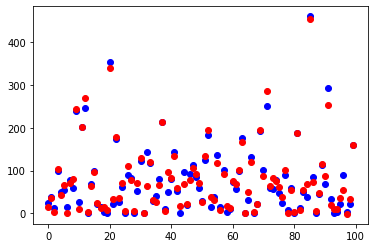

In [65]:
    plt.scatter(range(len(Y_test[:100])), Y_test[:100], color='blue')
    plt.scatter(range(len(y_predlegr[:100])), y_predlegr[:100], color='red')

In [26]:
xgbb=xgb.XGBRegressor().fit(X_train,Y_train)

[16:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
y_predxg=xgbb.predict(X_test)

In [28]:
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test, y_predxg)))
print("mean_absolute_error  " , mean_absolute_error(Y_test, y_predxg))
print("R2score    " , r2_score(Y_test,y_predxg))

mean_squared_error    18.66421353455383
mean_absolute_error   13.16443155800827
R2score     0.9531699237590863


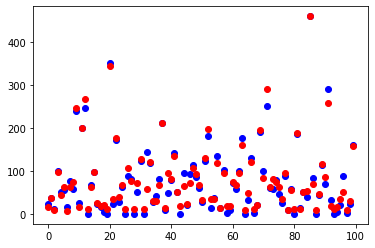

In [64]:
    plt.scatter(range(len(Y_test[:100])), Y_test[:100], color='blue')
    plt.scatter(range(len(y_predxg[:100])), y_predxg[:100], color='red')

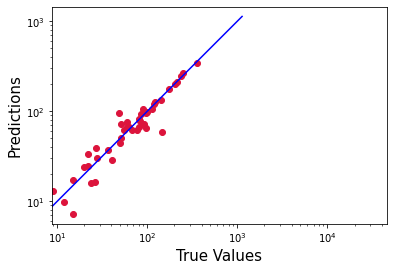

In [49]:

plt.scatter(Y_test[:50], y_predxg[:50], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predxg), max(Y_test))
p2 = min(min(y_predxg), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [29]:
rf=RandomForestRegressor(n_estimators=100).fit(X_train,Y_train)

In [30]:
y_predrf=rf.predict(X_test)

In [31]:
print("mean_squared_error   " , np.sqrt(mean_squared_error(Y_test, y_predrf)))
print("mean_absolute_error  " , mean_absolute_error(Y_test, y_predrf))
print("R2score    " , r2_score(Y_test,y_predrf))

mean_squared_error    19.042111038996236
mean_absolute_error   13.652993657643519
R2score     0.9512543728380054


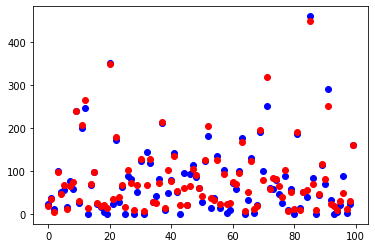

In [63]:
    plt.scatter(range(len(Y_test[:100])), Y_test[:100], color='blue')
    plt.scatter(range(len(y_predrf[:100])), y_predrf[:100], color='red')

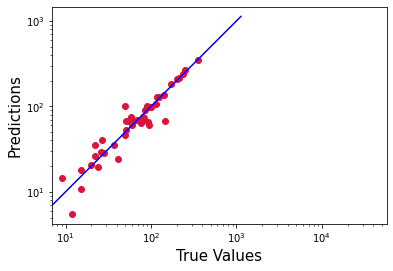

In [58]:

plt.scatter(Y_test[:50], y_predrf[:50], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predrf), max(Y_test))
p2 = min(min(y_predrf), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [40]:
Y_test[:10]

47749     24.0
6931      37.0
37610     12.0
36516     99.0
3477      50.0
20642     55.0
12882     15.0
56443     77.0
44091     59.0
23862    239.0
Name: ArrDelayMinutes, dtype: float64

In [56]:
y_predlegr[:10]

array([ 15.80731489,  35.7616594 ,   3.95403593, 103.26536127,
        42.04896131,  66.17815932,  -0.34701847,  69.7693388 ,
        79.53207811, 243.77191535])